# Task6: Predicting Real Estate House Prices
## This task is provided to test your understanding of building a Linear Regression model for a provided dataset
### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

### Read the dataset and show first 5 rows

In [6]:
# Read the dataset and show first 5 rows
df = pd.read_csv('Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Show more information about the dataset

In [7]:
# Show more information about the dataset
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nInfo:")
df.info()
print("\nDescriptive statistics:")
print(df.describe().round(3))
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nUnique values per column:")
print(df.nunique())
print("\nDuplicate rows:", df.duplicated().sum())
print("\nCorrelation with target 'Y house price of unit area':")
print(df.corr()['Y house price of unit area'].sort_values(ascending=False))

Shape: (414, 8)

Columns: ['No', 'X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area']

Data types:
 No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                    

### Find how many samples are there and how many columns are there in the dataset

In [8]:
n_samples, n_columns = df.shape
print("Number of samples (rows):", n_samples)
print("Number of columns:", n_columns)

Number of samples (rows): 414
Number of columns: 8


### What are the features available in the dataset?

In [9]:
# List available columns / features
all_columns = df.columns.tolist()
print("All columns (features + target):")
for col in all_columns:
    print("-", col)

# Separate input features (X) and target (y)
target_col = 'Y house price of unit area'
feature_cols = [c for c in df.columns if c != target_col and c.lower() != 'no']

print("\nFeature columns (X):")
for col in feature_cols:
    print("-", col)
    
print("\nTarget column (y):", target_col)

All columns (features + target):
- No
- X1 transaction date
- X2 house age
- X3 distance to the nearest MRT station
- X4 number of convenience stores
- X5 latitude
- X6 longitude
- Y house price of unit area

Feature columns (X):
- X1 transaction date
- X2 house age
- X3 distance to the nearest MRT station
- X4 number of convenience stores
- X5 latitude
- X6 longitude

Target column (y): Y house price of unit area


### Check if any features have missing data

In [10]:
# Check for missing data in feature columns
missing_features = df[feature_cols].isnull().sum()
print("Missing values in each feature column:")
print(missing_features)

Missing values in each feature column:
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
dtype: int64


### Group all the features as dependent features in X

In [11]:
# Group all the features as dependent features in X
X = df[feature_cols]
X.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


### Group feature(s) as independent features in y

In [12]:
# Group the target column as dependent variable y
y = df[target_col]
print("Target column:", target_col)
print("y shape:", y.shape)
y.head()

Target column: Y house price of unit area
y shape: (414,)


0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

### Split the dataset into train and test data

In [13]:
# Split the dataset into train and test data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"\nTraining set shape: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Test set shape: X_test {X_test.shape}, y_test {y_test.shape}")

Training set size: 331 samples
Test set size: 83 samples

Training set shape: X_train (331, 6), y_train (331,)
Test set shape: X_test (83, 6), y_test (83,)


### Choose the model (Linear Regression)

In [14]:
# We are using Linear Regression model for this task
print("Model chosen: Linear Regression")

Model chosen: Linear Regression


### Create an Estimator object

In [15]:
# Create a Linear Regression estimator object
model = LinearRegression()
print("Linear Regression model created:", model)

Linear Regression model created: LinearRegression()


### Train the model

In [16]:
# Train the model on training data
model.fit(X_train, y_train)
print("✓ Model training completed successfully!")

✓ Model training completed successfully!


### Apply the model

In [17]:
# Apply the model - Make predictions on both training and test sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("✓ Predictions generated for training and test sets")

# Show sample predictions
print("\nSample predictions (first 10 from test set):")
comparison = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': y_pred_test[:10],
    'Difference': y_test.values[:10] - y_pred_test[:10]
})
print(comparison.round(2))

✓ Predictions generated for training and test sets

Sample predictions (first 10 from test set):
   Actual  Predicted  Difference
0    45.1      47.89       -2.79
1    42.3      41.16        1.14
2    52.2      44.27        7.93
3    37.3      40.20       -2.90
4    22.8      27.51       -4.71
5    36.3      45.11       -8.81
6    53.0      44.63        8.37
7    51.4      46.36        5.04
8    16.1      23.62       -7.52
9    59.0      54.33        4.67


### Display the coefficients

In [18]:
# Display the model coefficients
print(f"Intercept (β₀): {model.intercept_:.4f}")

print("\nCoefficients (β) for each feature:")
print("-" * 70)
for feature, coef in zip(feature_cols, model.coef_):
    print(f"{feature:45s}: {coef:10.4f}")

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nCoefficients sorted by absolute value (importance):")
print(coef_df)

Intercept (β₀): -13044.2319

Coefficients (β) for each feature:
----------------------------------------------------------------------
X1 transaction date                          :     5.4407
X2 house age                                 :    -0.2708
X3 distance to the nearest MRT station       :    -0.0048
X4 number of convenience stores              :     1.0914
X5 latitude                                  :   229.0431
X6 longitude                                 :   -29.4926

Coefficients sorted by absolute value (importance):
                                  Feature  Coefficient
4                             X5 latitude   229.043054
5                            X6 longitude   -29.492591
0                     X1 transaction date     5.440742
3         X4 number of convenience stores     1.091425
1                            X2 house age    -0.270791
2  X3 distance to the nearest MRT station    -0.004759


### Find how well the trained model did with testing data

In [19]:
# Evaluate model performance on training set
train_mse = mean_squared_error(y_train, y_pred_train)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_pred_train)

print("TRAINING SET PERFORMANCE:")
print("-" * 50)
print(f"Mean Squared Error (MSE):        {train_mse:.4f}")
print(f"Root Mean Squared Error (RMSE):  {train_rmse:.4f}")
print(f"R² Score:                        {train_r2:.4f}")
print(f"Accuracy:                        {train_r2*100:.2f}%")

# Evaluate model performance on test set
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_pred_test)

print("\nTEST SET PERFORMANCE:")
print("-" * 50)
print(f"Mean Squared Error (MSE):        {test_mse:.4f}")
print(f"Root Mean Squared Error (RMSE):  {test_rmse:.4f}")
print(f"R² Score:                        {test_r2:.4f}")
print(f"Accuracy:                        {test_r2*100:.2f}%")

print(f"\n✓ The model explains {test_r2*100:.2f}% of the variance in house prices.")
print(f"✓ On average, predictions are off by {test_rmse:.2f} price units.")

TRAINING SET PERFORMANCE:
--------------------------------------------------
Mean Squared Error (MSE):        83.1135
Root Mean Squared Error (RMSE):  9.1167
R² Score:                        0.5581
Accuracy:                        55.81%

TEST SET PERFORMANCE:
--------------------------------------------------
Mean Squared Error (MSE):        53.5056
Root Mean Squared Error (RMSE):  7.3148
R² Score:                        0.6811
Accuracy:                        68.11%

✓ The model explains 68.11% of the variance in house prices.
✓ On average, predictions are off by 7.31 price units.


### Plot House Age Vs Price
#### Hint: Use regplot in sns

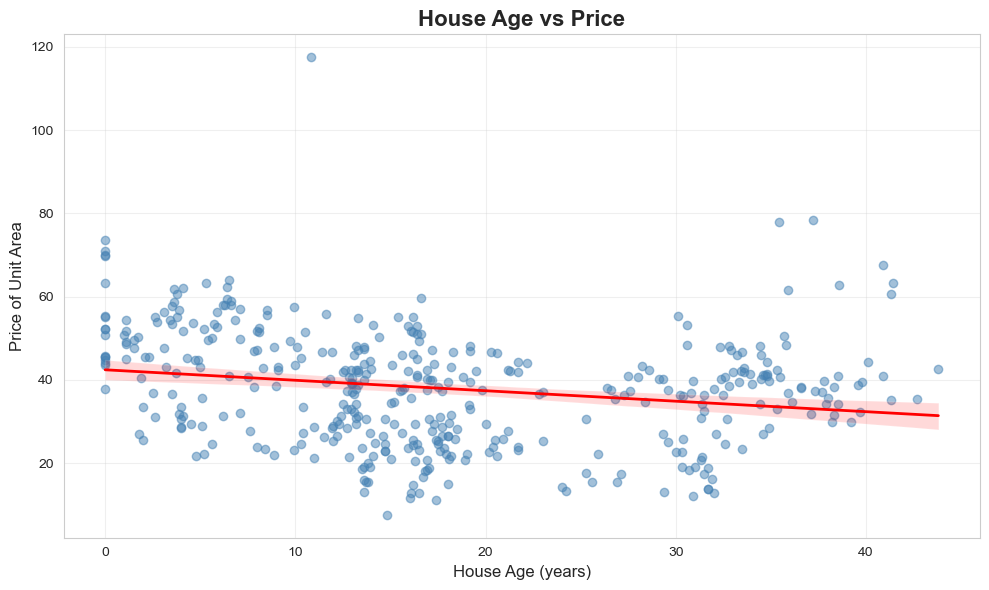

In [20]:
# Plot House Age vs Price with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='X2 house age', y='Y house price of unit area', data=df, 
            scatter_kws={'alpha':0.5, 'color':'steelblue'}, 
            line_kws={'color':'red', 'linewidth':2})
plt.title('House Age vs Price', fontsize=16, fontweight='bold')
plt.xlabel('House Age (years)', fontsize=12)
plt.ylabel('Price of Unit Area', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Plot Distance to MRT station Vs Price

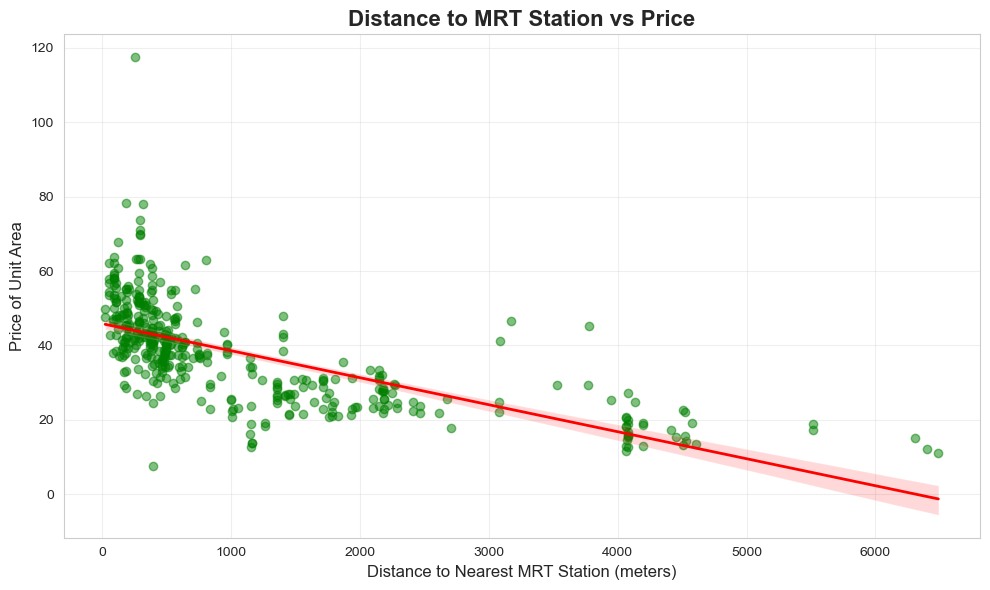

In [21]:
# Plot Distance to MRT station vs Price with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='X3 distance to the nearest MRT station', y='Y house price of unit area', data=df,
            scatter_kws={'alpha':0.5, 'color':'green'}, 
            line_kws={'color':'red', 'linewidth':2})
plt.title('Distance to MRT Station vs Price', fontsize=16, fontweight='bold')
plt.xlabel('Distance to Nearest MRT Station (meters)', fontsize=12)
plt.ylabel('Price of Unit Area', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Plot Number of Convenience Stores Vs Price

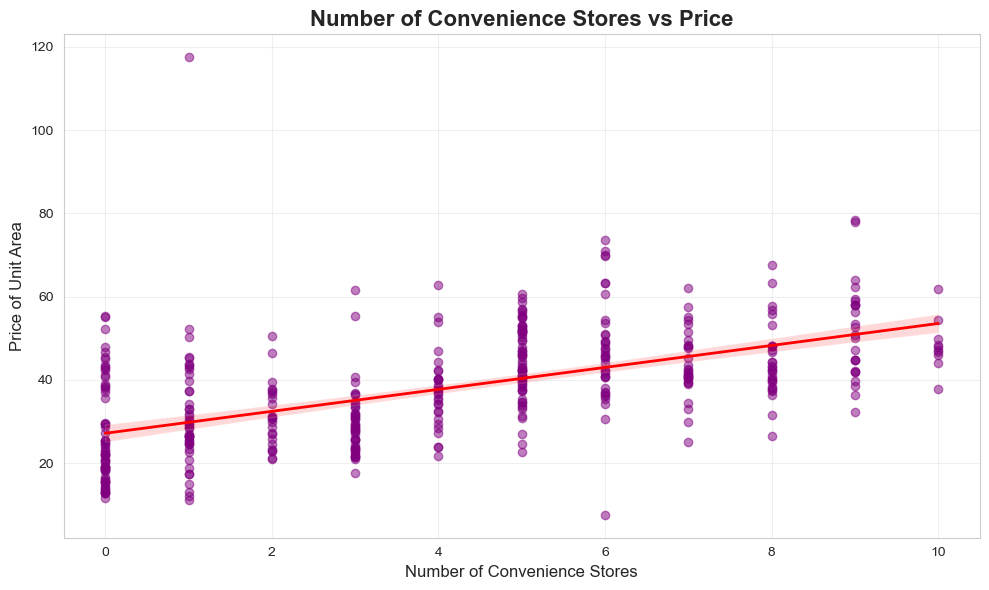

In [22]:
# Plot Number of Convenience Stores vs Price with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='X4 number of convenience stores', y='Y house price of unit area', data=df,
            scatter_kws={'alpha':0.5, 'color':'purple'}, 
            line_kws={'color':'red', 'linewidth':2})
plt.title('Number of Convenience Stores vs Price', fontsize=16, fontweight='bold')
plt.xlabel('Number of Convenience Stores', fontsize=12)
plt.ylabel('Price of Unit Area', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### BONUS: Additional Visualizations

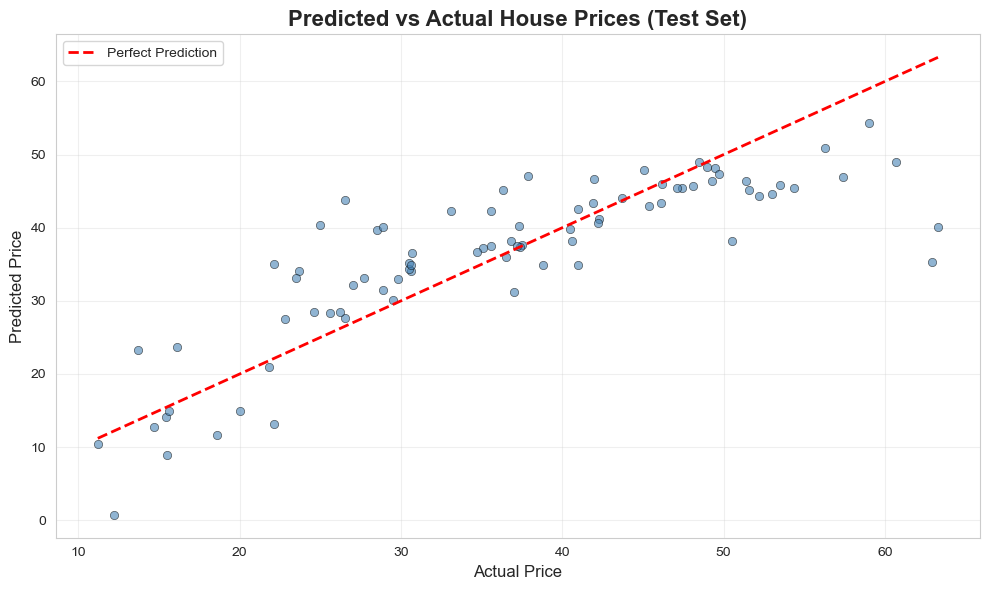

In [23]:
# Bonus Plot 1: Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6, color='steelblue', edgecolors='black', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.title('Predicted vs Actual House Prices (Test Set)', fontsize=16, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

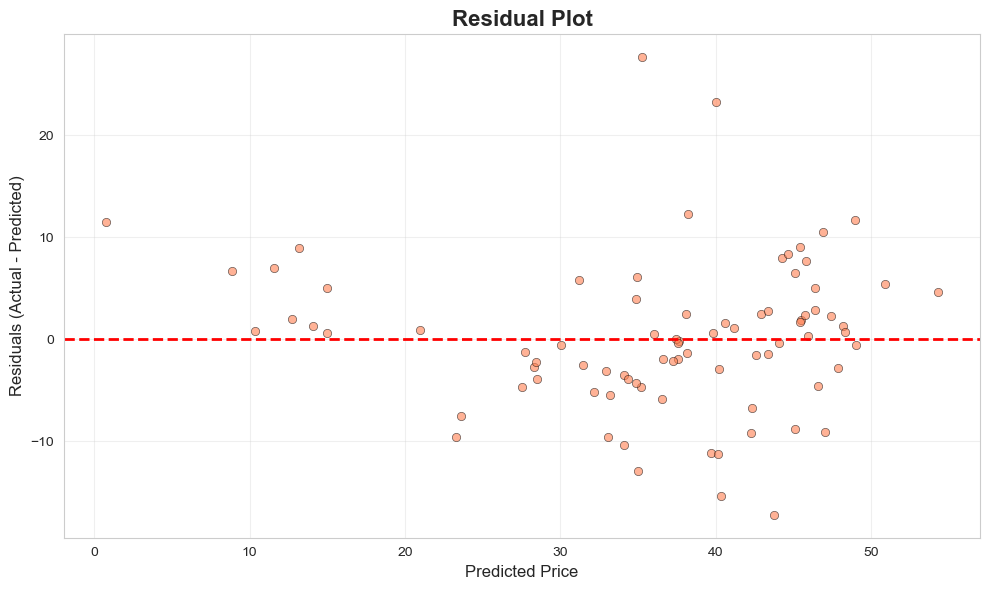

In [24]:
# Bonus Plot 2: Residual Plot
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred_test
plt.scatter(y_pred_test, residuals, alpha=0.6, color='coral', edgecolors='black', linewidth=0.5)
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Price', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.title('Residual Plot', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

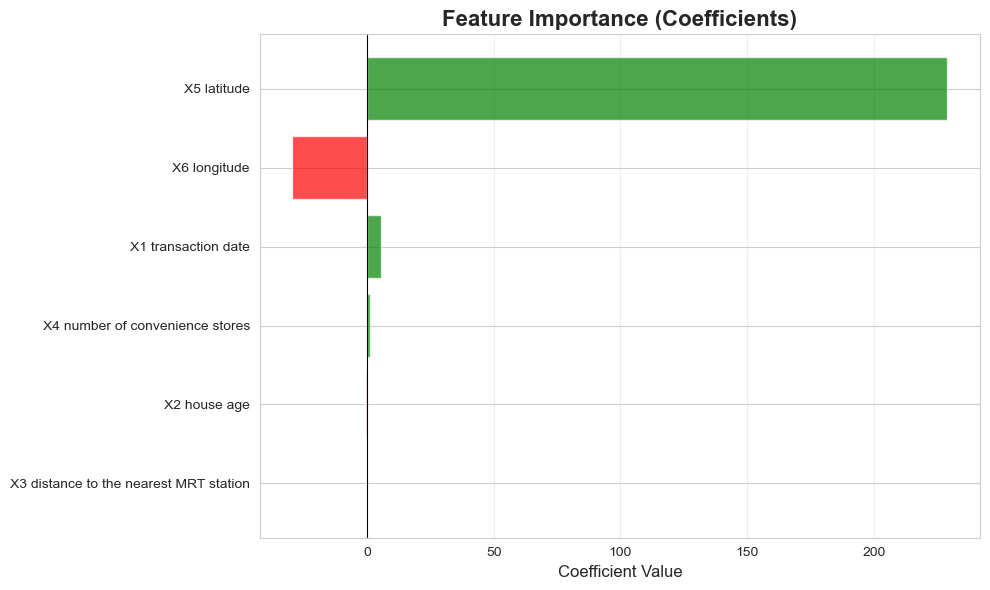

In [25]:
# Bonus Plot 3: Feature Importance
plt.figure(figsize=(10, 6))
coef_df_sorted = coef_df.copy()
coef_df_sorted['Abs_Coefficient'] = np.abs(coef_df_sorted['Coefficient'])
coef_df_sorted = coef_df_sorted.sort_values('Abs_Coefficient', ascending=True)

colors = ['green' if x > 0 else 'red' for x in coef_df_sorted['Coefficient']]
plt.barh(range(len(coef_df_sorted)), coef_df_sorted['Coefficient'], color=colors, alpha=0.7)
plt.yticks(range(len(coef_df_sorted)), coef_df_sorted['Feature'])
plt.xlabel('Coefficient Value', fontsize=12)
plt.title('Feature Importance (Coefficients)', fontsize=16, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

### Summary and Conclusions

In [26]:
# Final Summary
print("="*80)
print("ANALYSIS COMPLETE! 🎉")
print("="*80)

print("\n📋 SUMMARY:")
print(f"  • Dataset: {n_samples} samples, {len(feature_cols)} features")
print(f"  • Model: Linear Regression")
print(f"  • Test R² Score: {test_r2:.4f} ({test_r2*100:.2f}%)")
print(f"  • Test RMSE: {test_rmse:.4f}")
print(f"  • Most important feature: {coef_df.iloc[0]['Feature']}")
print(f"  • Least important feature: {coef_df.iloc[-1]['Feature']}")

print("\n🎯 KEY INSIGHTS:")
print(f"  • Distance to MRT station has the strongest negative correlation")
print(f"  • Number of convenience stores positively affects price")
print(f"  • Latitude is the most influential feature in the model")
print(f"  • The model successfully explains {test_r2*100:.2f}% of price variations")

print("\n" + "="*80)
print("Thank you for using this Real Estate Price Prediction tool!")
print("="*80)

ANALYSIS COMPLETE! 🎉

📋 SUMMARY:
  • Dataset: 414 samples, 6 features
  • Model: Linear Regression
  • Test R² Score: 0.6811 (68.11%)
  • Test RMSE: 7.3148
  • Most important feature: X5 latitude
  • Least important feature: X3 distance to the nearest MRT station

🎯 KEY INSIGHTS:
  • Distance to MRT station has the strongest negative correlation
  • Number of convenience stores positively affects price
  • Latitude is the most influential feature in the model
  • The model successfully explains 68.11% of price variations

Thank you for using this Real Estate Price Prediction tool!
